## Atividade 3

Dada a imagem (no repositório “imagens/gize.png”), realize a extração da pirâmide, por meio de uma máscara poligonal, para uma outra imagem com fundo na cor preto. 

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Faça upload da imagem se utilizando do seguinte snippet de código:

In [16]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('Usuario fez upload da imagem "{name}" com tamanho {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Importação das bibliotecas.

In [17]:
import glob

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/ipykernel_7275/344068320.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 2. Solução

Carregando a imagem original.

In [19]:
images = glob.glob("/Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/Visao Computacional/Atividades Checkpoint - Visão Computacional/Atividade 3/imagens/*")

In [20]:
images[0]

'/Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/Visao Computacional/Atividades Checkpoint - Visão Computacional/Atividade 3/imagens/gize.png'

Text(0.5, 1.0, 'Pirâmide')

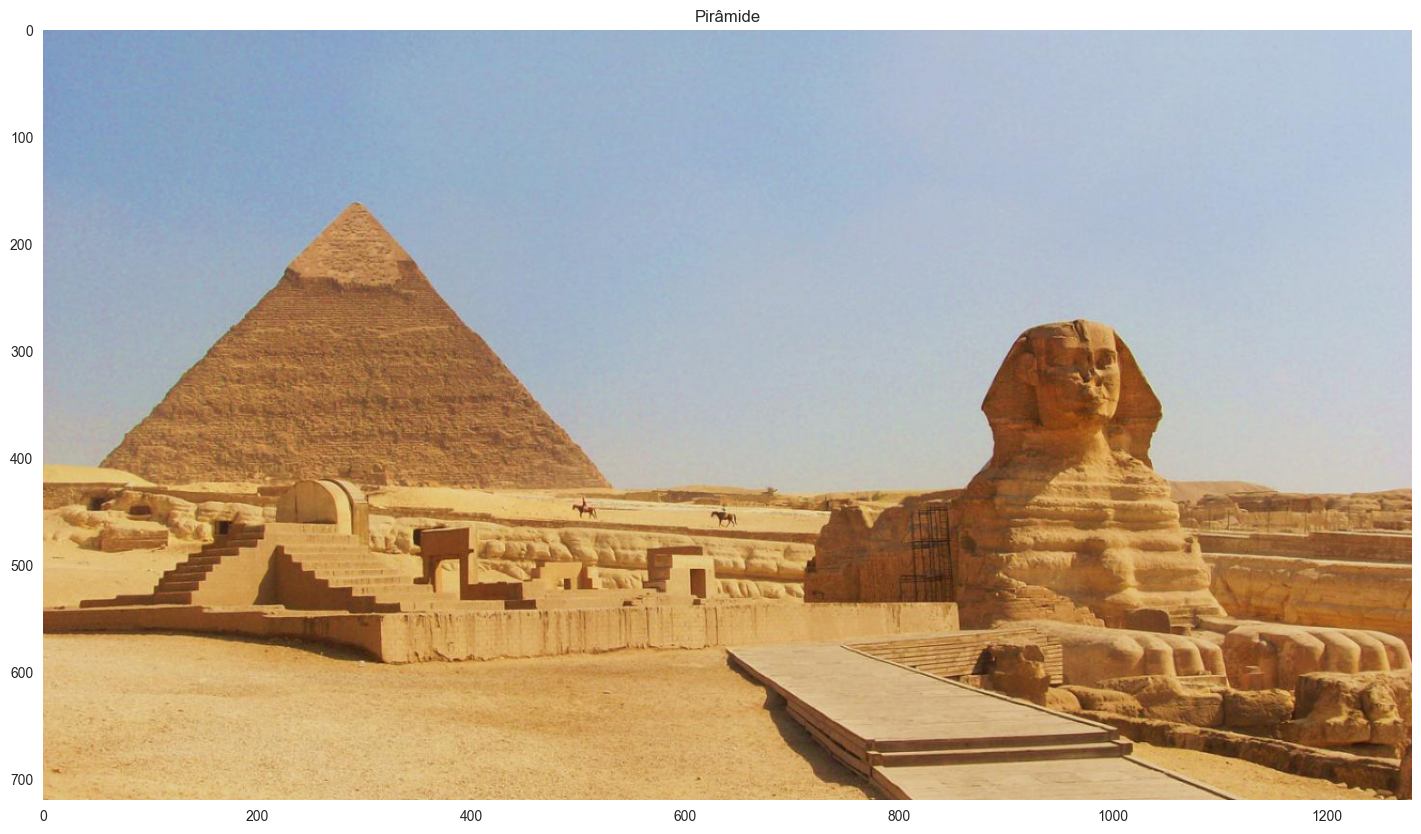

In [21]:
imagem = cv2.imread(images[0])
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Pirâmide")

Aplicando a máscara para realizar a subtração.

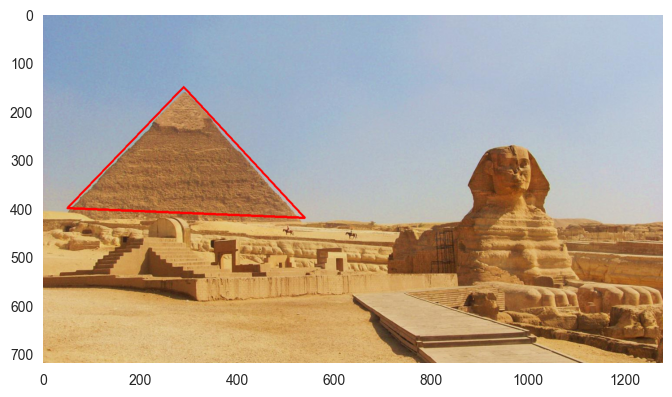

In [22]:
imagem = cv2.imread(images[0])
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

p1 = (50, 400)
p2 = (290, 150)
p3 = (540, 420)
  
cv2.line(imagem, p1, p2, (255, 0, 0), 3)
cv2.line(imagem, p2, p3, (255, 0, 0), 3)
cv2.line(imagem, p1, p3, (255, 0, 0), 3)

plt.imshow(imagem);

Realizando a operação de subtração.
*O seguinte [exemplo](https://docs.opencv.org/3.2.0/d0/d86/tutorial_py_image_arithmetics.html), da própria documentação do OpenCV, detalha um pouco sobre o uso das máscaras.*

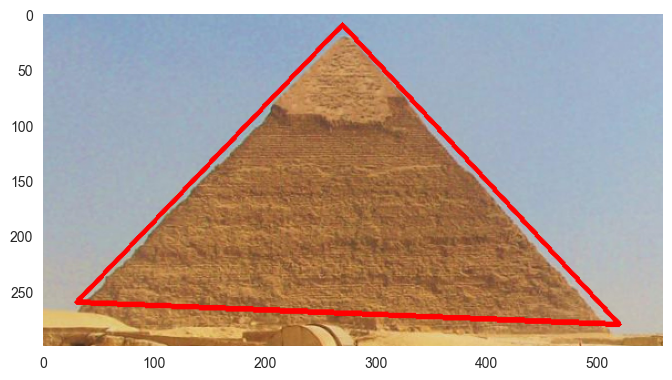

In [23]:
linha_y_inicio, coluna_x_inicio = 140, 20
linha_y_final, coluna_x_final = 440, 580

roi = imagem[linha_y_inicio:linha_y_final, coluna_x_inicio:coluna_x_final]

plt.imshow(roi)

In [24]:
img_black = np.zeros(roi.shape, np.uint8)

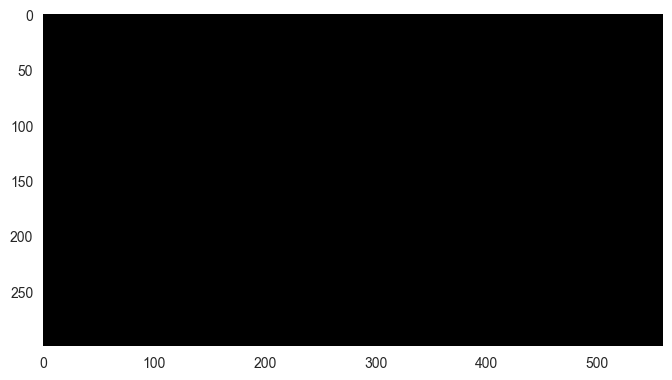

In [38]:
plt.imshow(img_black)

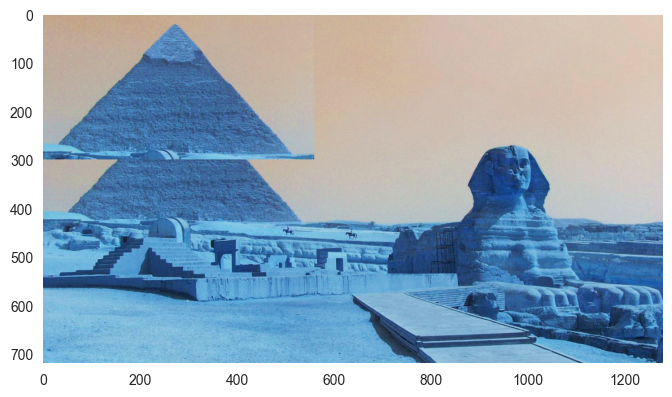

In [37]:
img1 = cv2.imread(images[0])
img2 = img_black
rows, cols, channels = img2.shape
roi = img1[linha_y_inicio:linha_y_final, coluna_x_inicio:coluna_x_final]
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 255, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)
img2_fg = cv2.bitwise_and(img2, img2, mask = mask)

dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst


plt.imshow(img1);

#Professor, nao faco ideia pq bugou desse jeito, segui o passo a passo certinho que vc ensinou em aula, 
#mas ficou bugadassa a cor da imagem, nao entendi foi nada


In [33]:
img1.shape

(720, 1280, 3)